In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tqdm import tqdm_notebook

1일 = 24시간 = 1440분 = 144 행
3일 = 72시간 = 4320분 = 432 행
30일 = 720시간 = 43200분 = 4320 행
train = 33일 = 792시간 = 47520분 = 4752 행 
입니다.

In [158]:
train = pd.read_csv('data/train.csv',index_col = 'id')
test = pd.read_csv('data/test.csv',index_col = 'id')

In [191]:
X_train = train.loc[:,'X00':"X40"]

In [193]:
X_train.shape

(4752, 40)

In [194]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [195]:
Y_train = train.iloc[:,-1]

In [198]:
Y_train = Y_train.fillna(0)

In [201]:
train_x, train_y = create_dataset(X_train,Y_train,12)

In [202]:
train_x.shape

(4740, 12, 40)

In [203]:
train_y.shape

(4740,)

In [204]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape = (12,40)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

In [205]:
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [218]:
Model_test = model.fit(train_x,train_y,epochs = 30,batch_size =500,verbose = 1)

Train on 4740 samples
Epoch 1/30
4740/4740 [==============================] - ETA: 1s - loss: 60.56 - ETA: 1s - loss: 62.53 - ETA: 1s - loss: 61.56 - ETA: 1s - loss: 62.71 - ETA: 0s - loss: 64.61 - ETA: 0s - loss: 64.70 - ETA: 0s - loss: 62.89 - ETA: 0s - loss: 62.86 - ETA: 0s - loss: 63.58 - 2s 396us/sample - loss: 62.5909
Epoch 2/30
4740/4740 [==============================] - ETA: 1s - loss: 59.53 - ETA: 1s - loss: 57.33 - ETA: 1s - loss: 58.38 - ETA: 1s - loss: 57.00 - ETA: 0s - loss: 63.20 - ETA: 0s - loss: 59.50 - ETA: 0s - loss: 60.88 - ETA: 0s - loss: 63.53 - ETA: 0s - loss: 63.21 - 2s 377us/sample - loss: 62.5982
Epoch 3/30
4740/4740 [==============================] - ETA: 1s - loss: 51.48 - ETA: 1s - loss: 60.84 - ETA: 1s - loss: 62.08 - ETA: 1s - loss: 63.65 - ETA: 0s - loss: 62.47 - ETA: 0s - loss: 62.39 - ETA: 0s - loss: 61.43 - ETA: 0s - loss: 64.15 - ETA: 0s - loss: 63.69 - 2s 373us/sample - loss: 62.5947
Epoch 4/30
4740/4740 [==============================] - ETA: 1s - 

4740/4740 [==============================] - ETA: 1s - loss: 54.28 - ETA: 1s - loss: 58.64 - ETA: 1s - loss: 61.50 - ETA: 1s - loss: 64.04 - ETA: 0s - loss: 64.06 - ETA: 0s - loss: 65.49 - ETA: 0s - loss: 66.05 - ETA: 0s - loss: 63.02 - ETA: 0s - loss: 63.06 - 2s 412us/sample - loss: 62.5984
Epoch 28/30
4740/4740 [==============================] - ETA: 1s - loss: 68.81 - ETA: 1s - loss: 70.41 - ETA: 1s - loss: 66.31 - ETA: 1s - loss: 66.77 - ETA: 0s - loss: 65.57 - ETA: 0s - loss: 64.32 - ETA: 0s - loss: 64.90 - ETA: 0s - loss: 64.35 - ETA: 0s - loss: 62.92 - 2s 383us/sample - loss: 62.5858
Epoch 29/30
4740/4740 [==============================] - ETA: 1s - loss: 73.22 - ETA: 1s - loss: 70.72 - ETA: 1s - loss: 69.14 - ETA: 1s - loss: 71.94 - ETA: 0s - loss: 67.19 - ETA: 0s - loss: 65.47 - ETA: 0s - loss: 64.93 - ETA: 0s - loss: 62.32 - ETA: 0s - loss: 62.70 - 2s 406us/sample - loss: 62.5864
Epoch 30/30
4740/4740 [==============================] - ETA: 1s - loss: 66.89 - ETA: 1s - loss: 

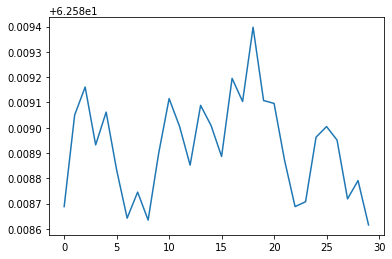

In [217]:
# batchsize = 4740
plt.plot(Model_test.history['loss'])

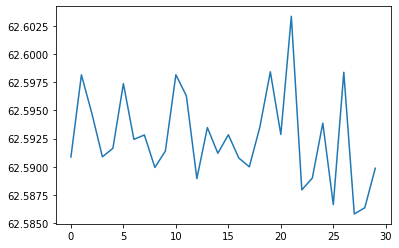

In [219]:
# batch_size = 500
plt.plot(Model_test.history['loss'])